In [1]:
#%loadpy /home/tony/Desktop/CLaw/plot_recomb.py

In [2]:
#! /usr/bin/env python

"""Script to visualize recomb transitions"""

import pylab, numpy

def recomb_freq(ni,nf,atom='h'):
    if atom=='h':
        ion = 13.598
        mtot = 1.007825
    elif atom=='he':
        ion = 24.587
        mtot = 4.0026

    ni = float(ni); nf = float(nf)
#    print 'assuming hydrogen...'

    # for freq1
#    h = 6.6262e-27
#    evtoerg = 1.602e-12
#    freq1 = ion*evtoerg * (1/nf**2 - 1/ni**2) / h

    # for freq2
    ry_inf = 109737.31
    c = 2.997925e10
    me = 5.48598e-4
    freq = ry_inf * (1 - me/mtot) * c * (1/nf**2 - 1/ni**2)

    return freq

def plot(flo,fhi,ntrans=5,atom='h'):
    nl = 50; nh = 300
    for trans in range(ntrans):
        freqs = []
        for i in range(nl,nh):
            freqs.append(recomb_freq(i+trans+1,i,atom=atom))
        pylab.plot(freqs,(trans+1)*numpy.ones(len(freqs)),'.')
    pylab.plot([500e6,10000e6],[0,0])
    pylab.axis([flo,fhi,-0.1,ntrans+0.1])
    pylab.legend()
    pylab.show()

def plot_stack(flo,fhi,ntrans=5,atom='h'):
    nl = 10; nh = 1000
    trans_letter = ['a','b','c','d','e','f','g','h']
    pylab.plot([500e6,10000e6],[0,0])
    pylab.axis([flo,fhi,-5,20])
    for trans in range(ntrans):
        freqs = []
        for i in range(nl,nh):
            if (recomb_freq(i+trans+1,i,atom=atom) >= flo) & (recomb_freq(i+trans+1,i,atom=atom) <= fhi):
                pylab.text(recomb_freq(i+trans+1,i,atom=atom), ntrans-trans, atom+str(i)+trans_letter[trans], horizontalalignment='center', verticalalignment='center')
    pylab.show()


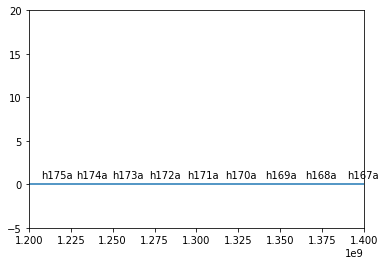

In [3]:
plot_stack(1.2e9,1.4e9,ntrans=1,atom='h')